In [107]:
import pandas as pd
import numpy as np
from linearmodels.panel import PanelOLS, compare
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.tsa.api import VAR
from gmm import *
from linearmodels.asset_pricing import LinearFactorModelGMM
from tabprintin.beautify import *
from statsmodels.sandbox.regression import gmm
import matplotlib.pyplot as plt

In [108]:
resource = "../../data/generated/"
results = "../../results/"

In [109]:
tex = []

In [110]:
%run do_analysis.ipynb

c:\Users\Huang\OneDrive - Università Commerciale Luigi Bocconi\python\macro-fundamental-factors\.env\Lib\site-packages\nbformat\__init__.py:93: MissingIDFieldWarning: Code cell is missing an id field, this will become a hard error in future nbformat versions. You may want to use `normalize()` on your notebooks before validations (available since nbformat 5.1.4). Previous versions of nbformat are fixing this issue transparently, and will stop doing so in the future.
  validate(nb)


         Current function value: 0.000002
         Iterations: 19
         Function evaluations: 4166
         Gradient evaluations: 62
         Current function value: 1.167547
         Iterations: 136
         Function evaluations: 12674
         Gradient evaluations: 189
         Current function value: 0.000000
         Iterations: 12
         Function evaluations: 3830
         Gradient evaluations: 57
         Current function value: 2.098526
         Iterations: 95
         Function evaluations: 8923
         Gradient evaluations: 133
         Current function value: 0.000000
         Iterations: 12
         Function evaluations: 4233
         Gradient evaluations: 63
         Current function value: 0.228586
         Iterations: 140
         Function evaluations: 12541
         Gradient evaluations: 187


In [111]:
mimick = pystout(models=[tables[0],tables[1]],
        # file='test_table.tex',
        addnotes=['Here is a little note','And another one'],
        digits=3,
        modstat={'nobs':'Obs','rsquared_adj':'Adj. R\sym{2}','fvalue':'F-stat'}
        )

tex.append(mimick)

In [112]:
summary_stats = tables[2]

var_name = (['MYP', 
             'UI', 
             'DSV', 
             'ATS',
             'STS', 
             'FX'])

stat_name = (['N', 
             r'Mean ($\times 10^3$)', 
             r'Std. dev. ($\times 10^3$)', 
             r'Min. ($\times 10^3$)', 
             r'25\% ($\times 10^3$)', 
             r'Median ($\times 10^3$)',
             r'75\% ($\times 10^3$)',
             r'Max. ($\times 10^3$)'])

summary_stats.index = var_name
summary_stats.columns = stat_name

summary_stats.N = summary_stats.N.astype(int)
summary_stats.iloc[:,1:] = summary_stats.iloc[:,1:] * 1000

summary_tex = summary_stats.style.format(decimal='.', thousands=',', precision=3).to_latex()

tex.append(summary_tex)

In [113]:
var = tables[3]

coef_data = var.params
tstat_data = var.tvalues

row_name = (['Constant',
             'HML',
             'SMB',
             'WML',
             'MYP', 
             'UI', 
             'DSV', 
             'ATS',
             'STS', 
             'FX'])

col_name = (['HML',
             'SMB',
             'WML',
             'MYP', 
             'UI', 
             'DSV', 
             'ATS',
             'STS', 
             'FX'])

var_latex = table_to_latex(coef_data, tstat_data,  row_name, col_name, sideways=True)

tex.append(var_latex)

In [115]:
row_name = ([r'Market price of risk ($\lambda$)'])

col_name = (['MYP',
             'UI', 
             'DSV', 
             'ATS',
             'STS', 
             'FX'])

for i in [0,1,2]: 
    premia_table = table_to_latex(pd.DataFrame(premia_port[i]), pd.DataFrame(premia_t_stat_port[i]), col_name, row_name)
    tex.append(premia_table)

In [116]:
for index, t in enumerate(tex):
    # Open a .tex file for writing
    with open(results + f'table{index+1}.tex', 'w') as f:
        # Write the LaTeX string to the file
        f.write(t)

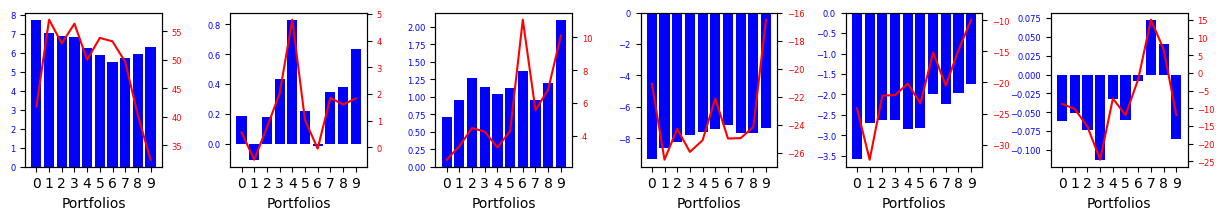

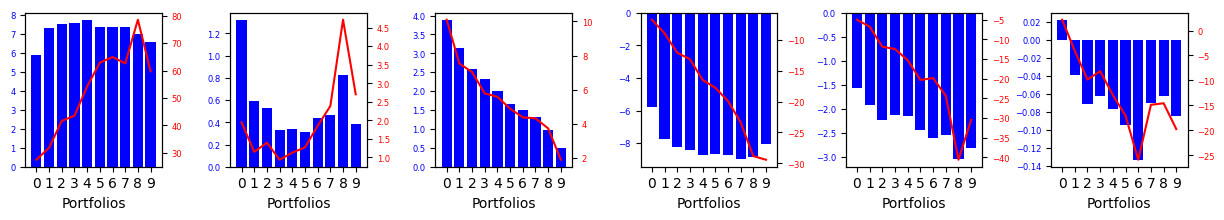

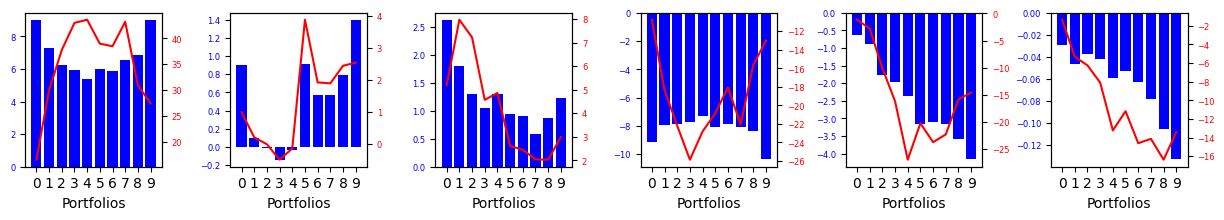

In [120]:
for j in [0,1,2]:
    # Create a figure with subplots for each column
    fig, axs = plt.subplots(1, 6, figsize=(15, 2))
    # Generate random data for example
    coefficients = beta_port[j]
    # coefficients = np.arange(1, beta.shape[0]+1)
    t_stats = beta_t_stat_port[j]
    # t_stats = np.arange(1, beta_t_stat.shape[0]+1)

    # Loop through each column and plot the histogram and line plot
    for i in range(coefficients.shape[1]):
        # Plot histogram of coefficients on left y-axis
        axs[i].bar(np.arange(coefficients.shape[0]), coefficients[:, i], color='blue')
        # axs[i].set_ylabel('Coefficients', color='blue', fontsize=5)
        axs[i].tick_params(axis='y', labelcolor='blue', labelsize=6)
        
        # Add line plot of t-stats on right y-axis
        axs2 = axs[i].twinx()
        axs2.plot(np.arange(t_stats.shape[0]), t_stats[:, i], color='red')
        # axs2.set_ylabel('T-Stats', color='red', fontsize=5)
        axs2.tick_params(axis='y', labelcolor='red', labelsize=6)
        
        # Set x-axis label and tick marks
        axs[i].set_xlabel('Portfolios')
        axs[i].set_xticks(np.arange(coefficients.shape[0]))

    # Increase space between subplots
    fig.subplots_adjust(wspace=0.5)
    
plt.show()
